In [1]:

# -*- coding: utf-8 -*-
# 比特币走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
# 数据加载
df = pd.read_csv('/Users/bingqihou/Documents/DataAnalysis54/bitcoin/bitcoin_2012-01-01_to_2018-10-31.csv')
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# 数据探索
print(df.head())


            Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01 2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02 2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03 2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04 2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         106.330084        4.471603  
2012-01-01          35.259720        4.806667  
2012-01-02          95.240000        5.000000  
2012-01-03          58.100651        5.252500  
2012-01-04          63.119578        5.208159  


In [3]:
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()


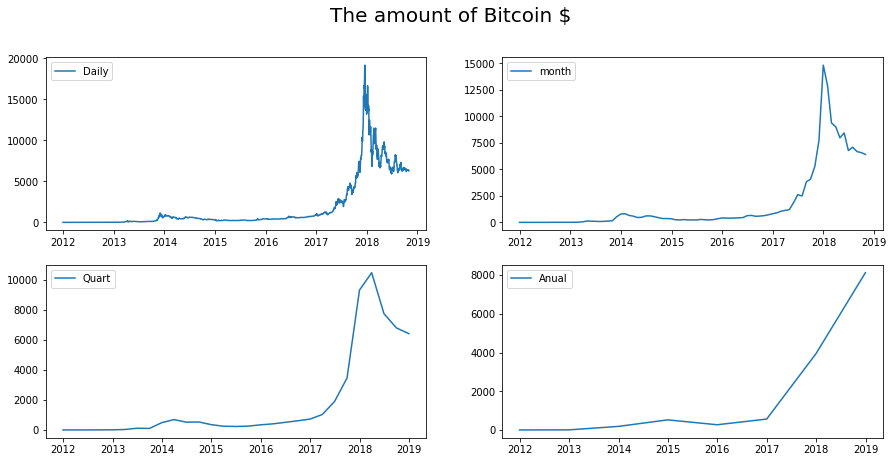

In [7]:
# 按照天，月，季度，年来显示比特币的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('The amount of Bitcoin $', fontsize=20)
#subplot(nrows, ncols, index)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='Daily')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='month')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='Quart')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='Anual')
plt.legend()
plt.show()


In [11]:
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
#product相当于于一个组合
parameters = product(ps, qs)
parameters_list = list(parameters)
print(parameters_list)


[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [9]:
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


参数错误: (0, 2)


In [14]:
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table)

print('最优模型: ', best_model.summary())


  parameters          aic
0     (0, 0)  1574.941439
1     (0, 1)  1485.999944
2     (1, 0)  1388.133959
3     (1, 1)  1385.522632
4     (1, 2)  1387.219783
5     (2, 0)  1386.505532
6     (2, 1)  1387.318994
7     (2, 2)  1389.134233
最优模型:                                ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.761
Date:                Sun, 13 Sep 2020   AIC                           1385.523
Time:                        15:35:39   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.410
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [18]:
# 比特币预测
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), 
             datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=91)
print(df_month2)

           Close High  Low Open Volume_(BTC) Volume_(Currency)  \
2011-12-31   NaN  NaN  NaN  NaN          NaN               NaN   
2012-01-31   NaN  NaN  NaN  NaN          NaN               NaN   
2012-02-29   NaN  NaN  NaN  NaN          NaN               NaN   
2012-03-31   NaN  NaN  NaN  NaN          NaN               NaN   
2012-04-30   NaN  NaN  NaN  NaN          NaN               NaN   
...          ...  ...  ...  ...          ...               ...   
2019-02-28   NaN  NaN  NaN  NaN          NaN               NaN   
2019-03-31   NaN  NaN  NaN  NaN          NaN               NaN   
2019-04-30   NaN  NaN  NaN  NaN          NaN               NaN   
2019-05-31   NaN  NaN  NaN  NaN          NaN               NaN   
2019-06-30   NaN  NaN  NaN  NaN          NaN               NaN   

            Weighted_Price     forecast  
2011-12-31        4.471603  2128.906081  
2012-01-31        6.208550   111.073272  
2012-02-29        5.252527   138.592606  
2012-03-31        4.962021   128.511652

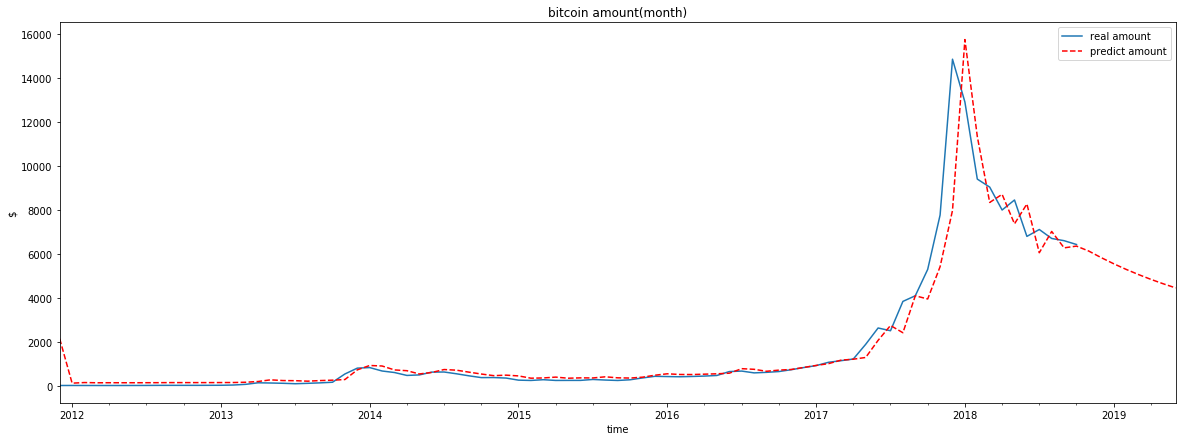

In [17]:
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='real amount')
df_month2.forecast.plot(color='r', ls='--', label='predict amount')
plt.legend()
plt.title('bitcoin amount(month)')
plt.xlabel('time')
plt.ylabel('$')
plt.show()